## Computational Physics: Solving the Time Independant Schrodinger Equation

Abby Wilson, Teddy Pena, Reed Spitzer

import libraries

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from __future__ import print_function, division

initialize variables:
psi is the wave function, 
u = dpsi/dx

In [41]:
psi0 = 0 #initial value of psi
u0 = 1 #intial value of derivative of psi

x0 = 0 
xf = 5
step = 0.001
numsteps = int(xf/step) + 1

In [42]:
x = np.linspace(x0, xf, numsteps)

Solve the TISE using Euler's approximation

In [43]:
# define the potential function
def V(position):
    if position <= 0:
        return 0
    return position

In [44]:
def calcEulers(E):

    psi = np.zeros([numsteps])
    u = np.zeros([numsteps])

    psi[0] = psi0
    u[0] = u0
    
    for i in range(1, numsteps):
        u[i] = u[i-1] + step * (-2) * (E - V((i-1)*step)) * psi[i-1]
        psi[i] = psi[i-1] + step * u[i-1]
         
    return u, psi

In [45]:
def calcAB(E):
    
    psi = np.zeros([numsteps])
    u = np.zeros([numsteps])
    
    u_, psi_ = calcEulers(E)
    
    u[0] = u0
    psi[0] = psi0
    u[1] = u_[1]
    psi[1] = psi_[1]
    
    for i in range(2, numsteps):
        psi[i] = psi[i-1] + (3/2)*step*(u[i-1]) - (1/2)*step*(u[i-2])
        u[i] = u[i-1] + (3/2)*step*(-2*psi[i-1]*(E-x[i-1])) - \
        (1/2)*step*(-2*psi[i-2]*(E-x[i-2]))
    
    return u, psi

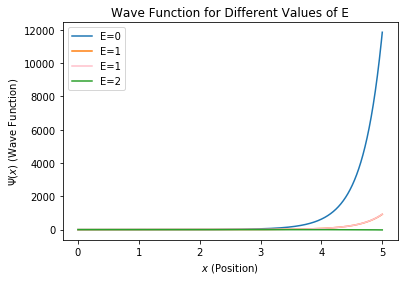

In [47]:
# Here, y is a dummy variable. we have to set something equal to u, but we're not using u here. 
y_, wave_func0 = calcEulers(0)
y_, wave_func1 = calcEulers(1)
y_, wave_func2 = calcEulers(2)

y_, wave_func1_ = calcAB(1)
plt.plot(x, wave_func0, label="E=0")
plt.plot(x, wave_func1, label="E=1")
plt.plot(x, wave_func1_, color="pink", label="E=1")
plt.plot(x, wave_func2, label="E=2")
plt.legend()
plt.xlabel("$x$ (Position)")
plt.ylabel("$\\Psi(x)$ (Wave Function)")
plt.title("Wave Function for Different Values of E")
plt.show()